<a href="https://colab.research.google.com/github/pratik25042000/telecom-churn-analysis/blob/main/Pratik_Kshirsagar_Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# firstly the data from the file telecom churn is laoded or explore 

In [ ]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_dir_path = '/content/drive/My Drive/'
telcom_df = pd.read_csv(working_dir_path + 'capstone project 1/Telecom Churn.csv')

In [ ]:
telcom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
telcom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
telcom_df.shape

(3333, 20)

In [ ]:
no_of_rows=telcom_df.shape[0]
no_of_columns=telcom_df.shape[1]
print("Rows     : ",no_of_rows)
print("Columns  : ",no_of_columns)

Rows     :  3333
Columns  :  20


In [ ]:
telcom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Missing values
print(telcom_df.isnull().sum())
print(telcom_df.nunique())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64
State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls       


Clearly we can see that no null values are present in our dataset, thereby we can proceed with uni-variate analysis.



In [ ]:
telcom_df['State'].nunique()

51

there are 51 state in which the user is present

In [ ]:
telcom_df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
CO     66
WA     66
NV     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

these are the values of user per state

In [ ]:
per=(telcom_df['Churn'].sum()) *100/telcom_df.shape[0]
print('The percentage of customers churning from the company is: %{}'.format(per) )

The percentage of customers churning from the company is: %14.491449144914492


this is The percentage of customers churning from the company

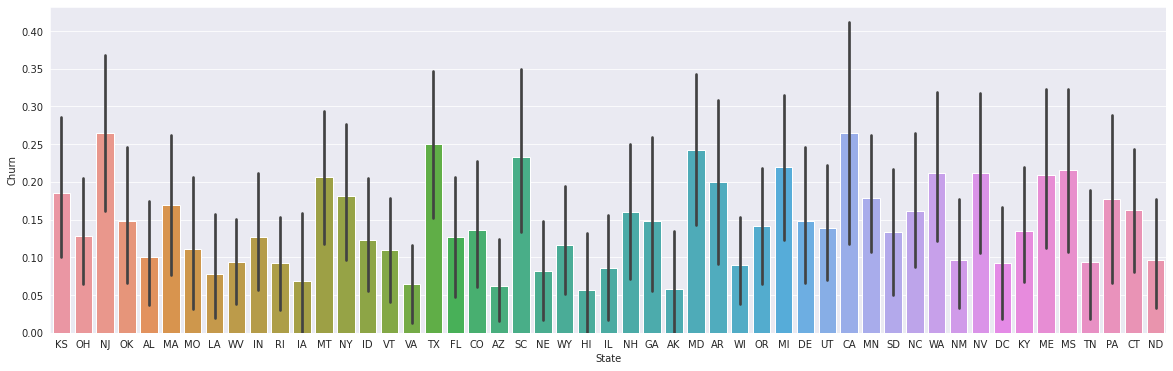

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.barplot(data=telcom_df,x='State',y='Churn')

In [ ]:
telcom_df['Churn'].value_counts()

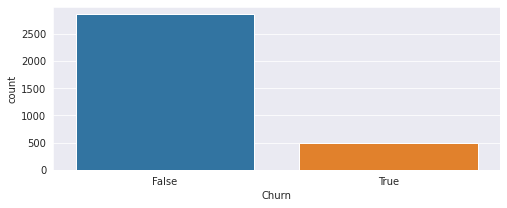

In [ ]:
plt.figure(figsize = (8,3))
sns.countplot(data = telcom_df, x = 'Churn')
plt.show()

By this graphh it is clear that, Most people do not leave the service

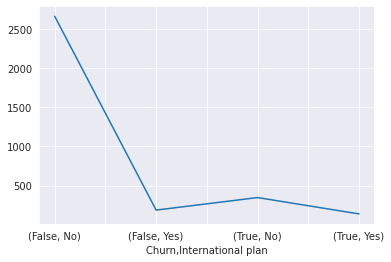

In [ ]:
churn_intl = telcom_df.groupby(['Churn','International plan']).size()
churn_intl.plot()
plt.show()

By this graphh it is clear that, We can see that not many users opt for International plans


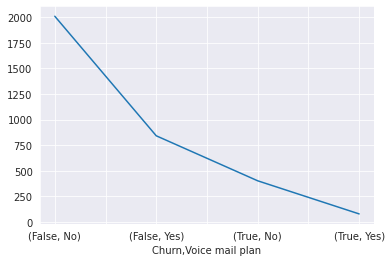

In [ ]:
churn_voicem = telcom_df.groupby(['Churn','Voice mail plan']).size()
churn_voicem.plot()
plt.show()

By this graphh it is clear that, Many users do not opt for a voice mail plan

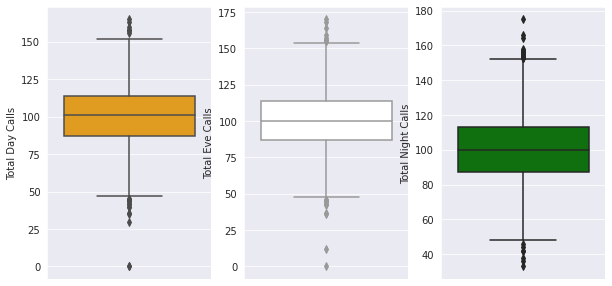

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(data=telcom_df, y = 'Total day calls', color = 'orange')
plt.ylabel('Total Day Calls', fontsize = 10)

plt.subplot(1,3,2)
sns.boxplot(data =telcom_df, y = 'Total eve calls', color = 'white')
plt.ylabel('Total Eve Calls', fontsize = 10)

plt.subplot(1,3,3)
sns.boxplot(data=telcom_df, y = 'Total night calls', color = 'green')
plt.ylabel('Total Night Calls', fontsize = 10)

plt.show()

By this representation it is clear that, We can see that more calls are made in the morning with respect to the evening and night when it is the lowest

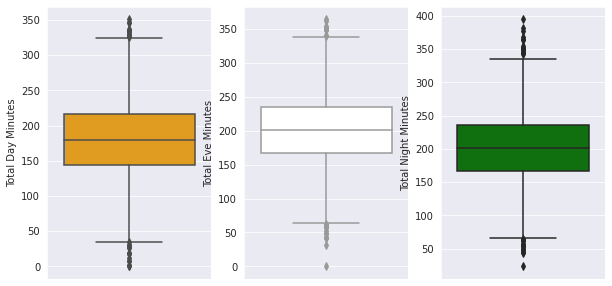

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(data=telcom_df, y = 'Total day minutes', color = 'orange')
plt.ylabel('Total Day Minutes', fontsize = 10)

plt.subplot(1,3,2)
sns.boxplot(data = telcom_df, y = 'Total eve minutes', color = 'white')
plt.ylabel('Total Eve Minutes', fontsize = 10)

plt.subplot(1,3,3)
sns.boxplot(data=telcom_df, y = 'Total night minutes', color = 'green')
plt.ylabel('Total Night Minutes', fontsize = 10)

plt.show()

By this representation it is clear that,

Despite having more calls made during the day, we can see that users do not spend longer time on the calls in the morning.

Users tend to talk for longer time in the afternoon than other times

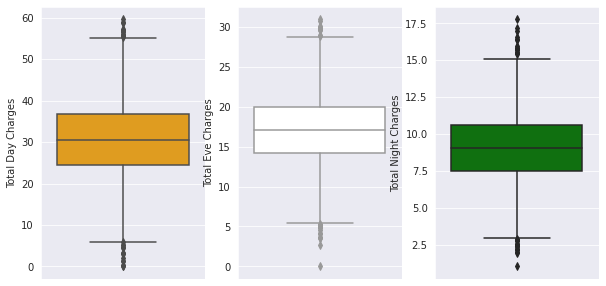

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(data=telcom_df, y = 'Total day charge', color = 'orange')
plt.ylabel('Total Day Charges', fontsize = 10)

plt.subplot(1,3,2)
sns.boxplot(data = telcom_df, y = 'Total eve charge', color = 'white')
plt.ylabel('Total Eve Charges', fontsize = 10)

plt.subplot(1,3,3)
sns.boxplot(data=telcom_df, y = 'Total night charge', color = 'green')
plt.ylabel('Total Night Charges', fontsize = 10)

plt.show()

By this representation it is clear that,

The charges are maximum in the evening time and lowest in the night time.

These plots are in conjunction with the minutes spoken.

In [ ]:
telcom_dftotal = pd.DataFrame(telcom_df['Churn'])

In [ ]:
#Creating three columns for total minutes, total calls and total charges
telcom_dftotal['Total minutes'] = telcom_df['Total day minutes'] + telcom_df['Total eve minutes'] + telcom_df['Total night minutes']
telcom_dftotal['Total calls'] = telcom_df['Total day calls'] + telcom_df['Total eve calls'] + telcom_df['Total night calls']
telcom_dftotal['Total charges'] = telcom_df['Total day charge'] + telcom_df['Total eve charge'] + telcom_df['Total night charge']

In [ ]:
telcom_dftotal.head()

,Churn,Total minutes,Total calls,Total charges
0,False,707.2,300,72.86
1,False,611.5,329,55.54
2,False,527.2,328,59.00
3,False,558.2,248,65.02
4,False,501.9,356,49.36


Text(0, 0.5, 'Total Charges')

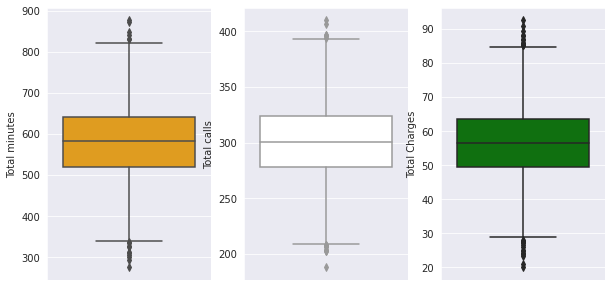

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(data = telcom_dftotal, y = 'Total minutes', color = 'orange')
plt.ylabel('Total minutes', fontsize = 10)

plt.subplot(1,3,2)
sns.boxplot(data = telcom_dftotal, y = 'Total calls', color = 'white')
plt.ylabel('Total calls', fontsize = 10)

plt.subplot(1,3,3)
sns.boxplot(data = telcom_dftotal, y = 'Total charges', color = 'green')
plt.ylabel('Total Charges', fontsize = 10)

By this representation it is clear that,Each attribute is consistent with each other suggesting normal pricing for calls made.

In [ ]:
corr = telcom_df.corr()

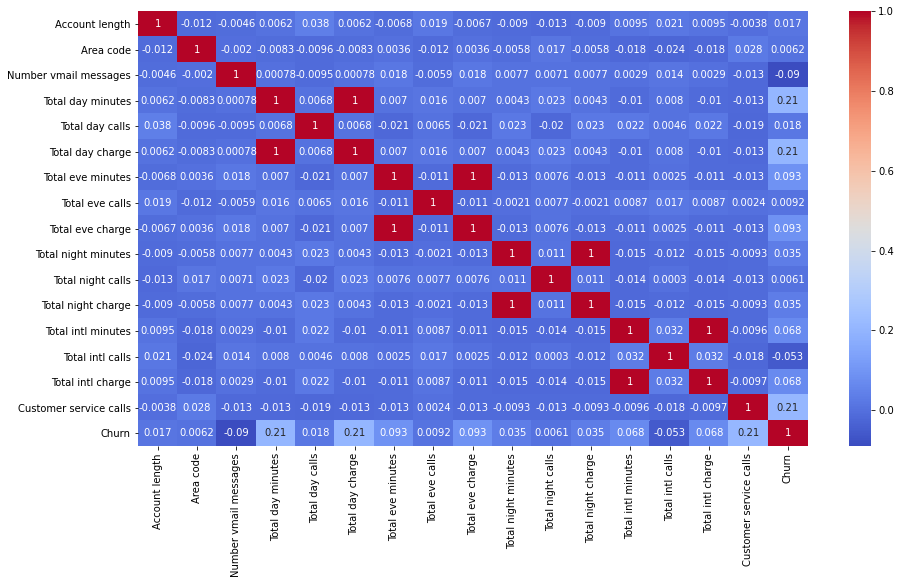

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

Observation:
With regard to the heatmap we can see high correlation bettween the following 

variables:
With respect to churn

Total day minutes to Churn at 0.2

Total day charge to Churn at 0.2

Customer service calls to Churn at 0.2


Other relations:
Total day charge to Total day minutes at 1

Total evening charge to total eve minutes at 1

total night charge to total night minute at 1


In [ ]:
pd.crosstab(telcom_df['Churn'], telcom_df['Customer service calls'], margins=True)

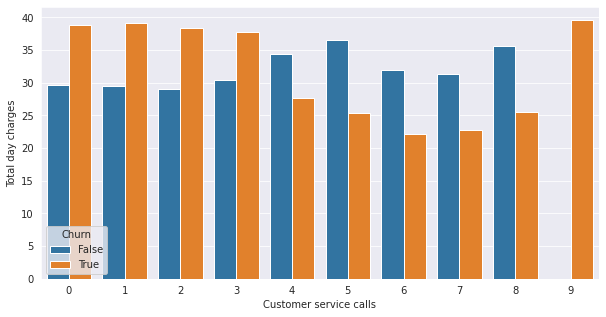

In [ ]:
# How does Total day minutes spoken relate to the Churn rate
plt.figure(figsize=(10,5))
sns.barplot(data = telcom_df, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 10)
plt.ylabel('Total day charges', fontsize = 10)
plt.show()

We can see that if customer service calls are made more than 7 times, then the service is bound to be cancelled. This also comes with high charges imposed on the user.

At the same time we can see that many users leave the service over 1 to 3 calls made to the customer service when are charged more. Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.

<Figure size 720x360 with 0 Axes>

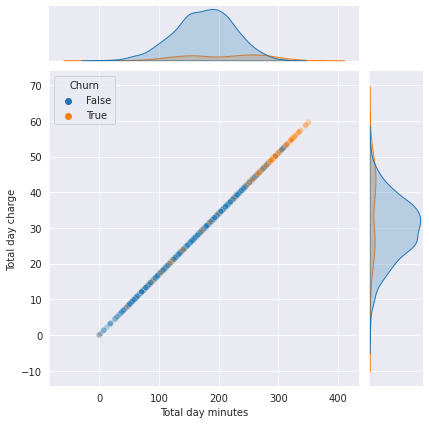

In [ ]:
plt.figure(figsize = (10,5))
sns.jointplot(data = telcom_df, x = 'Total day minutes', y = 'Total day charge',
                hue = 'Churn', alpha = 0.3)
plt.xlabel('Total Day Minutes', fontsize = 10)
plt.ylabel('Total Day Charges', fontsize = 10)
plt.show()

A linear relationship can be observed between the two Variables.

Visible Churn can be seen with higher charges imposed when spoken for longer times.

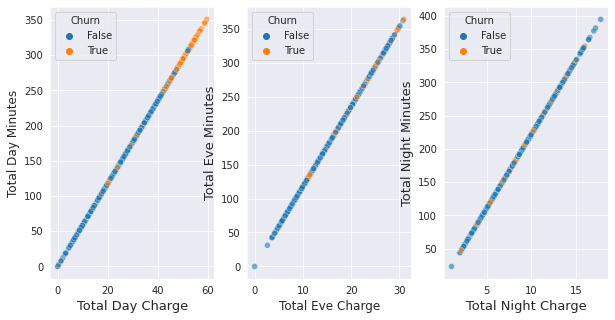

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.scatterplot(data = telcom_df, x = 'Total day charge', y = 'Total day minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Day Charge', fontsize = 13)
plt.ylabel('Total Day Minutes', fontsize = 12)

plt.subplot(1,3,2)
sns.scatterplot(data = telcom_df, x = 'Total eve charge', y = 'Total eve minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Eve Charge', fontsize = 12)
plt.ylabel('Total Eve Minutes', fontsize = 13)

plt.subplot(1,3,3)
sns.scatterplot(data = telcom_df, x = 'Total night charge', y = 'Total night minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Night Charge', fontsize = 13)
plt.ylabel('Total Night Minutes', fontsize = 13)

plt.show()

We can observe from the three scatterplots that the churn rate is maximum times True in the Day.

In the evening and night we can see that the churn rate is not so relevant.

Text(14.124479166666674, 0.5, 'Count')

<Figure size 720x360 with 0 Axes>

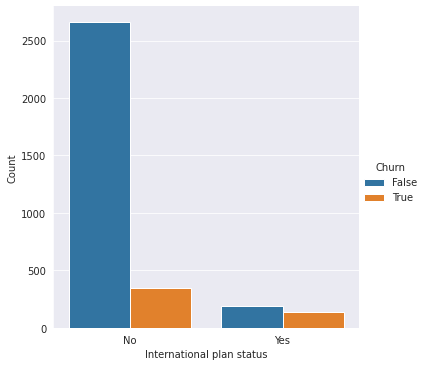

In [ ]:
plt.figure(figsize = (10,5))
sns.catplot(data = telcom_df, x ='International plan', hue = 'Churn',
           kind = 'count')
plt.xlabel('International plan status', fontsize = 10)
plt.ylabel('Count', fontsize = 10)


Users who Have an international plan are relatively very less than those who do not.

We can also observe that people who have an international plan have almost equal churn rate.

Text(14.145746527777781, 0.5, 'Count')

<Figure size 720x360 with 0 Axes>

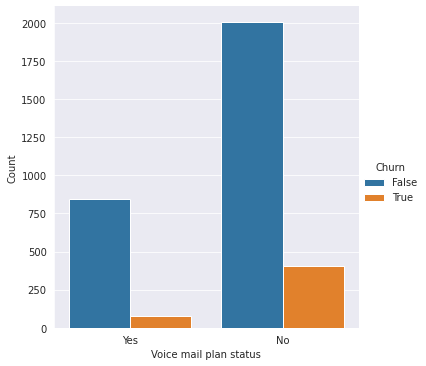

In [ ]:
plt.figure(figsize = (10,5))
sns.catplot(data = telcom_df, x ='Voice mail plan', hue = 'Churn',
           kind = 'count')
plt.xlabel('Voice mail plan status', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Less number of user churn from the voice mail plan as compare to international plan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


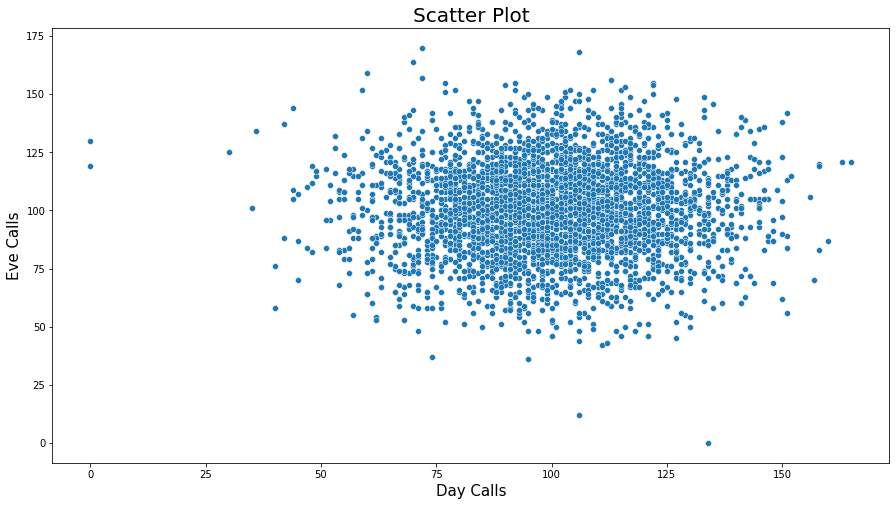

In [ ]:
# Plot a Scatterplot using seaborn library
plt.rcParams["figure.figsize"] = (15,8)
sns.scatterplot(telcom_df["Total day calls"],telcom_df["Total eve calls"],palette = "dark")
plt.title("Scatter Plot",fontsize=20)
plt.xlabel("Day Calls",fontsize=15)
plt.ylabel("Eve Calls",fontsize=15)
plt.show()

# **Conclusion**
It can be observed that the majority people that use the service within the morning represent shorter amounts of your time but make more calls.

International plan users are more according to their churn with respect to those who don't have the service.

# Prescription: 

1. Introducing plans which minimize costs for more number of calls can be used.
2. Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.
3. Improvement in the customer service can be done to reduce the number of calls which cause the churn.
4. Need to Upgrade or make smarter use of technologies like VoLTE to improve Voice Quality.
5. Cracking sound or noise during a call
6. Upgrading their services when in emegency only in evening period as low network traffic.